In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset
stability_df = pd.read_csv("stability_dataset.csv")
stability_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
# Check for missing values
stability_df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [4]:
# summary statistics
stability_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


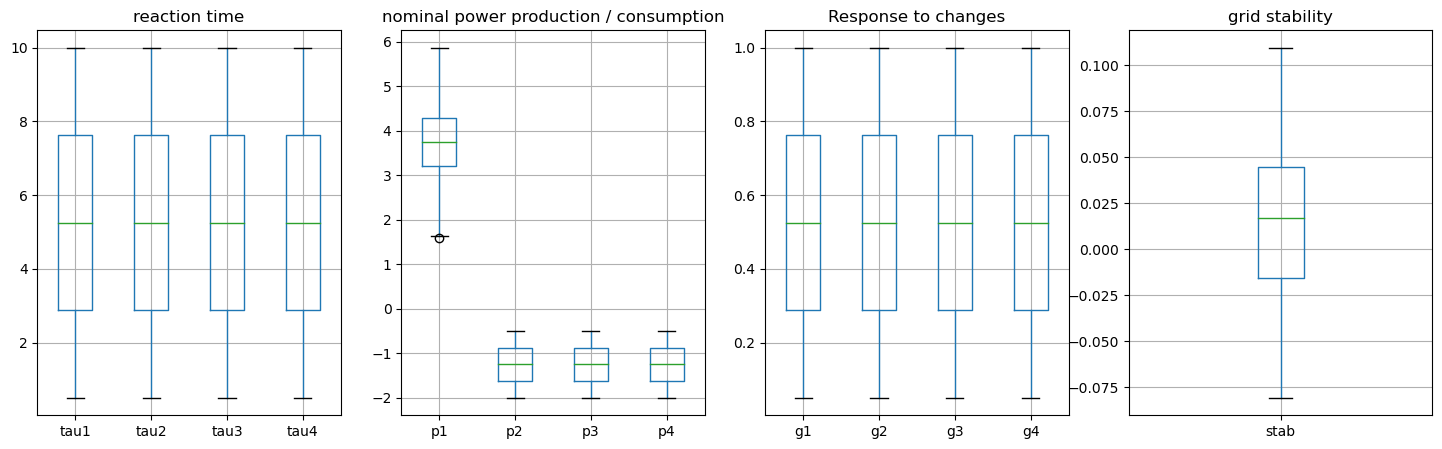

In [5]:
# Visualize key features in the dataset using box plots

fig, axs = plt.subplots(1, 4, figsize=(18, 5))

for axs_col, features in enumerate(["tau", "p", "g"]):
    stability_df.boxplot(
        column=[features + str(i + 1) for i in range(4)],
        ax= axs[axs_col]
    )
stability_df.boxplot(column="stab", ax= axs[3])

for axs_col, title in enumerate(["reaction time", "nominal power production / consumption",
                                 "Response to changes", "grid stability"]):
    axs[axs_col].set(title=title)

stabf
unstable    0.638
stable      0.362
Name: proportion, dtype: float64


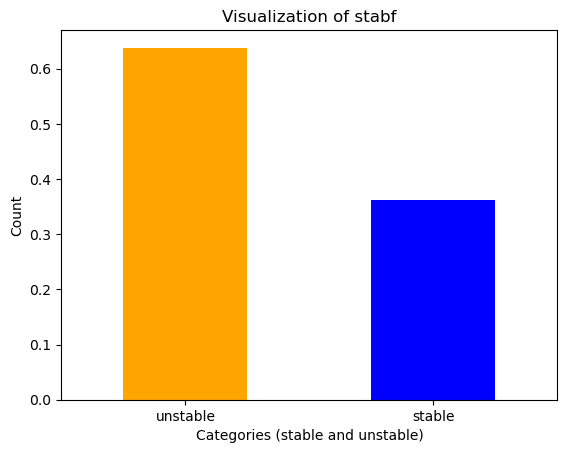

In [6]:
# Visualize the categorical feature stabf

category_counts = stability_df['stabf'].value_counts(normalize=True)
print(category_counts)

category_counts.plot(kind='bar', color=['orange', 'blue'])
plt.title('Visualization of stabf')
plt.xlabel('Categories (stable and unstable)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [7]:
# Convert the categorical variables
stability_df['stabf'] = stability_df['stabf'].map({'stable': 0 , 'unstable': 1})
stability_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,1
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,0
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,1
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,1
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,1


In [8]:
# check the data type of the target
stability_df['stabf'].dtype

dtype('int64')

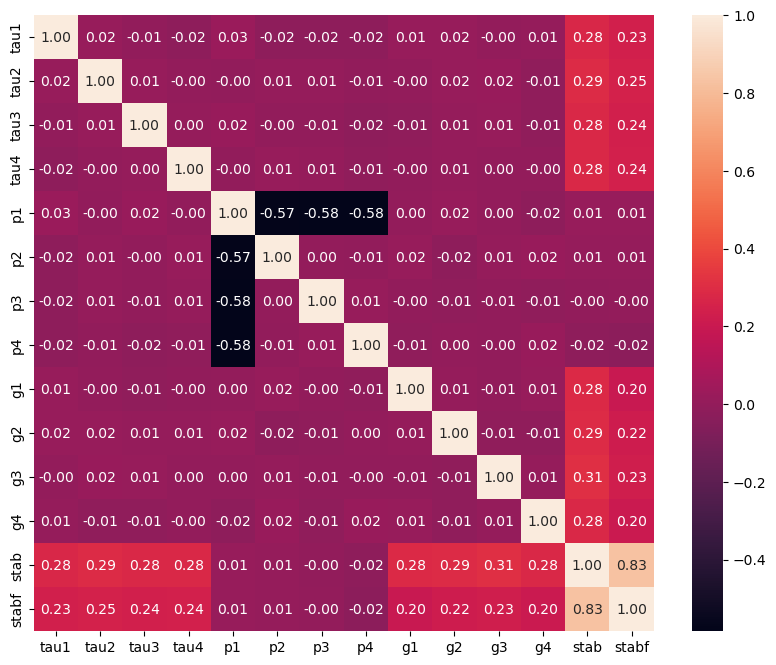

In [9]:
# plot a correlation heatmap to understand the features
plt.figure(figsize = (10, 8))
sns.heatmap(stability_df.corr(), fmt=".2f", annot=True);

In [11]:
# Define the features and targets variables
X = stability_df.drop(['stabf', 'stab', 'p1', 'p2', 'p3','p4'], axis =1)
y = stability_df['stabf']

# split the data into training, validation and testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=(0.10/0.80), random_state=42, stratify=y_train_val)


print(f"Original data shape: {X.shape}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")


Original data shape: (10000, 8)
X_train shape: (7000, 8), y_train shape: (7000,)
X_val shape: (1000, 8), y_val shape: (1000,)
X_test shape: (2000, 8), y_test shape: (2000,)


In [12]:
# Instantiate standard scaler
scaler = StandardScaler()

# scale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)



 Training and Evaluating Base Models 
                 Model  Train Accuracy  Validation Accuracy  Test Accuracy
3                  SVM           98.04                 97.1          97.60
1        Random Forest           97.67                 90.7          91.65
2                  KNN           93.86                 88.2          89.20
4                   DT           94.60                 86.6          86.35
0  Logistic Regression           81.23                 82.0          82.00


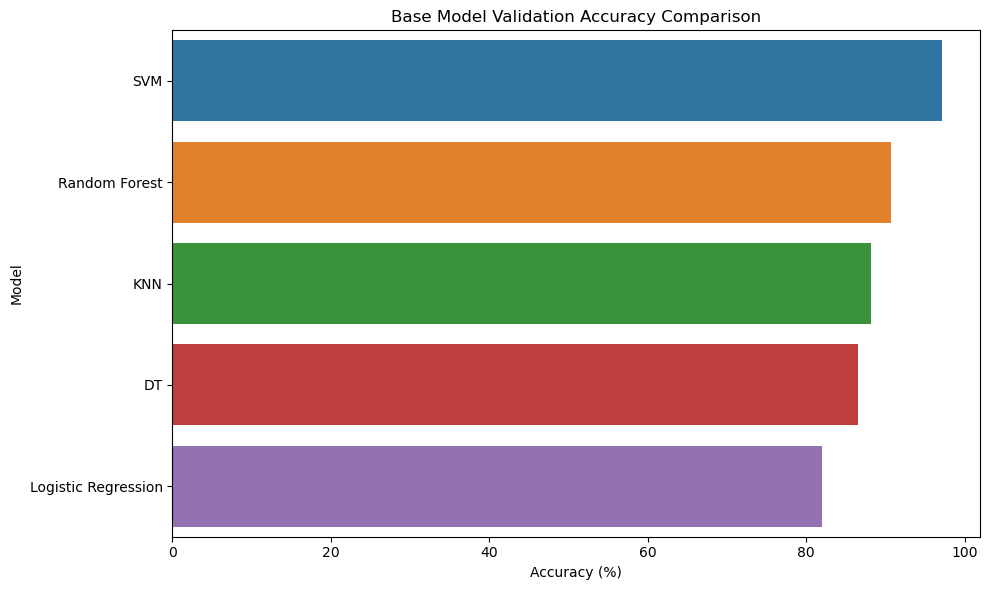

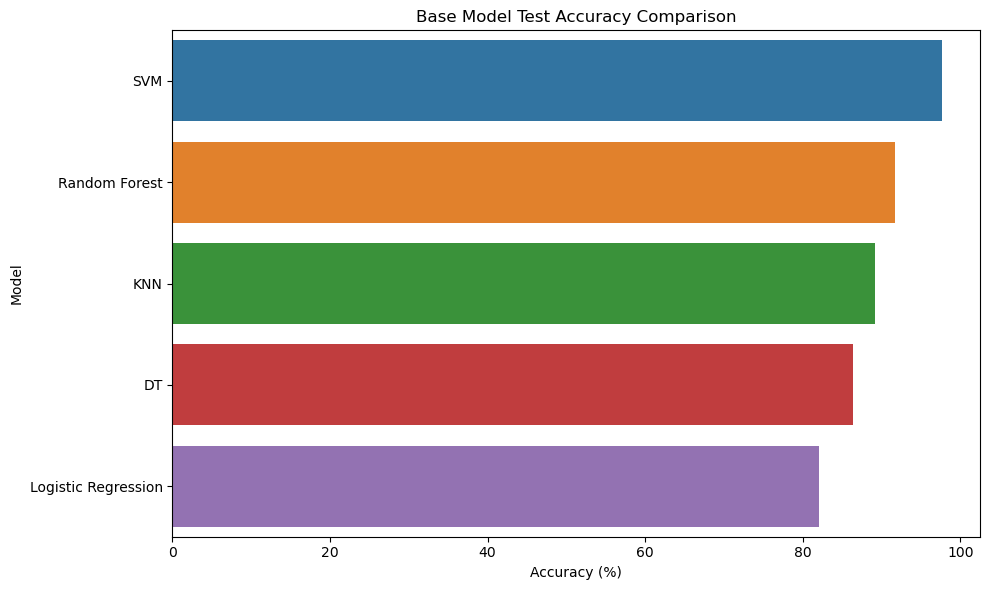

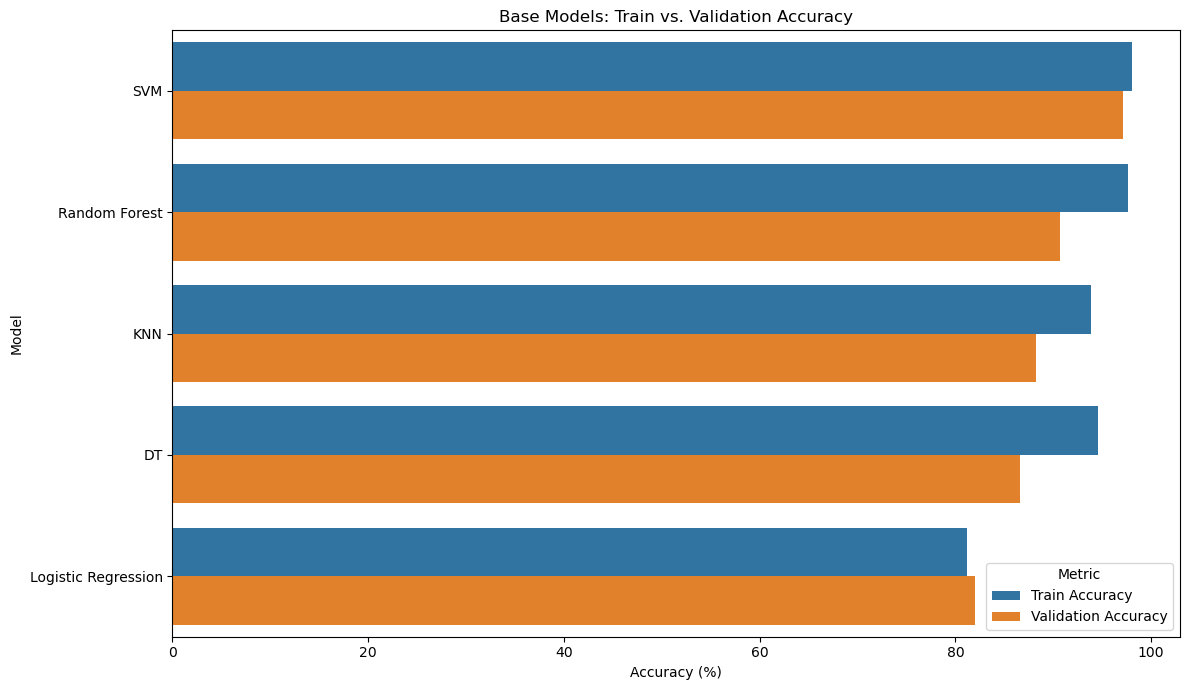

In [13]:
import base_models
results_df = base_models.base_models_predictions(X_train_scaled, X_val_scaled, y_train, y_val, X_test_scaled, y_test)
print(results_df)

# Plot Validation Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Validation Accuracy', y='Model', data=results_df.sort_values(by="Validation Accuracy", ascending=False))
plt.title("Base Model Validation Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Plot Test Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=results_df.sort_values(by="Test Accuracy", ascending=False))
plt.title("Base Model Test Accuracy Comparison")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Overfitting check (Train vs Validation)
results_melted = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Validation Accuracy'],
                                 var_name='Metric', value_name='Accuracy')
plt.figure(figsize=(12, 7))
sns.barplot(x='Accuracy', y='Model', hue='Metric', data=results_melted)
plt.title("Base Models: Train vs. Validation Accuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()


 Training ANN model (Feature Extractor)
Epoch 28: early stopping
Restoring model weights from the end of the best epoch: 18.
ANN Model Final Test Accuracy: 98.00%
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


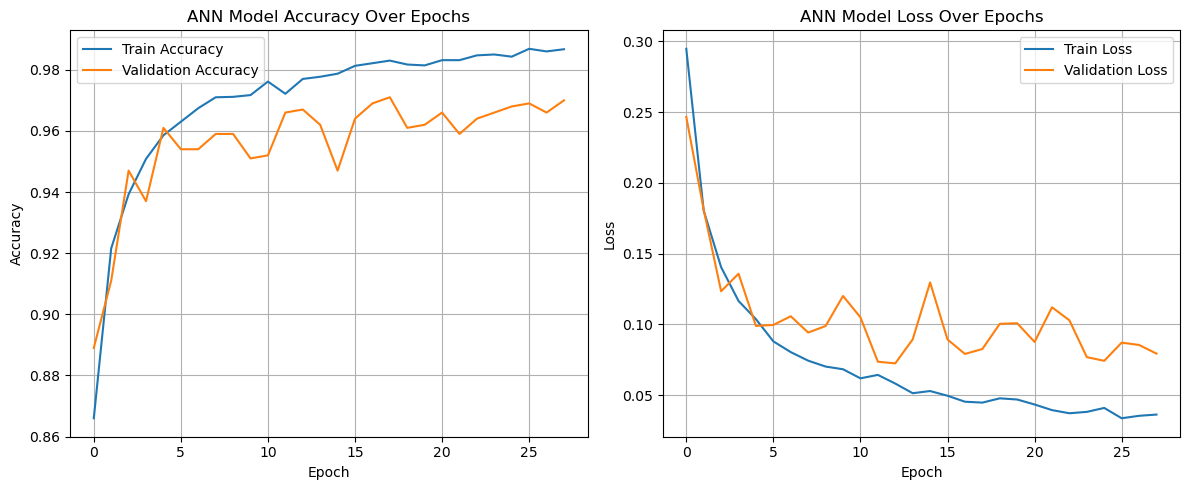

In [14]:
import ann_feature_extraction

X_train_features, X_val_features, X_test_features, trained_ann_model, history = ann_feature_extraction.extract_ann_features(X_train_scaled, X_val_scaled, X_test_scaled, y_train, y_val, y_test)

# Plots ANN Learning Curves to check for Overfitting
plt.figure(figsize=(12, 5))

# Plot Accuracy over Epochs
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss over Epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


 Training and Evaluating Hybrid Models
Training and Validation Results:
                     Model  Train Accuracy  Validation Accuracy
3                  ANN-SVM           99.70                 97.1
0  ANN-Logistic Regression           99.66                 97.0
1        ANN-Random Forest           99.56                 96.7
2                  ANN-KNN           99.06                 96.6
4                   ANN-DT           98.79                 93.8

Test Results:
                     Model  Test Accuracy
3                  ANN-SVM          98.00
0  ANN-Logistic Regression          97.95
2                  ANN-KNN          97.35
1        ANN-Random Forest          97.15
4                   ANN-DT          95.40


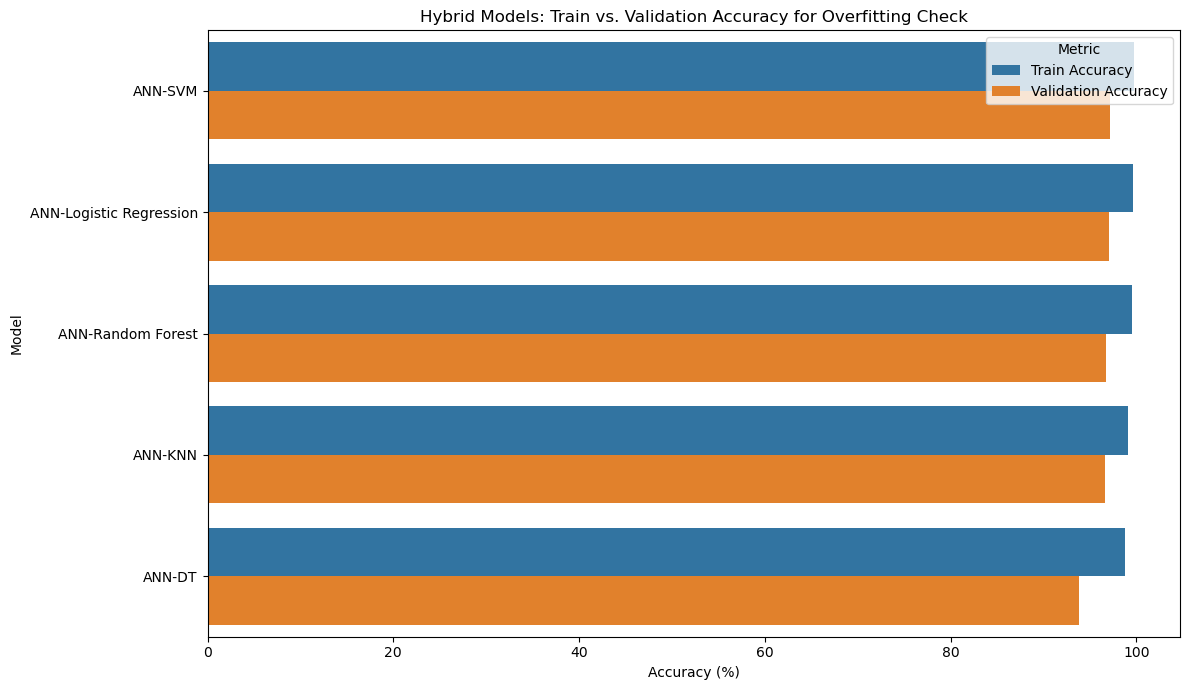

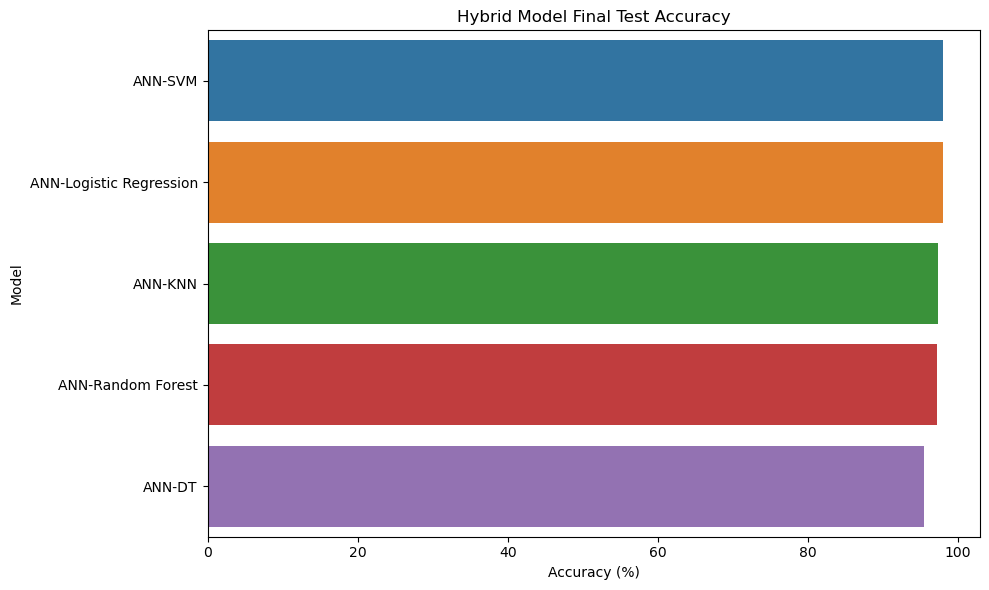

In [15]:
# Train and evaluate ensemble models using MLP features
import ensemble_models

val_train_results_df, test_results_df = ensemble_models.train_ensemble_models(X_train_features, X_val_features, X_test_features, y_train, y_val, y_test)

# Display validation and test accuracy results
print("Training and Validation Results:")
print(val_train_results_df)

print("\nTest Results:")
print(test_results_df)

# Plotting Train vs Validation Accuracy for Overfitting Check
fig, ax = plt.subplots(figsize=(12, 7))
val_train_results_df_plot = val_train_results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Validation Accuracy'], var_name='Metric', value_name='Accuracy')
sns.barplot(x='Accuracy', y='Model', hue='Metric', data=val_train_results_df_plot, ax=ax)
ax.set_title("Hybrid Models: Train vs. Validation Accuracy for Overfitting Check")
ax.set_xlabel("Accuracy (%)")
ax.set_ylabel("Model")
plt.tight_layout()
plt.show()

# Plot final test accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x='Test Accuracy', y='Model', data=test_results_df )
plt.title("Hybrid Model Final Test Accuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Model")
plt.tight_layout()
plt.show()